# 데이터의 RMS를 관찰하는 프로그램

In [28]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf

In [29]:
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [30]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


In [31]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

# real time RMS wave form
출처 : https://www.youtube.com/watch?v=9kL8bmfj-YQ   

In [43]:
sound_file = "./train/RUNQPNJF.ogg"

# 오디오 파일 읽기
data, sample_rate = sf.read(sound_file)

# 오디오 재생
sd.play(data, sample_rate)

# 오디오 재생이 끝날 때까지 대기
sd.wait()

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

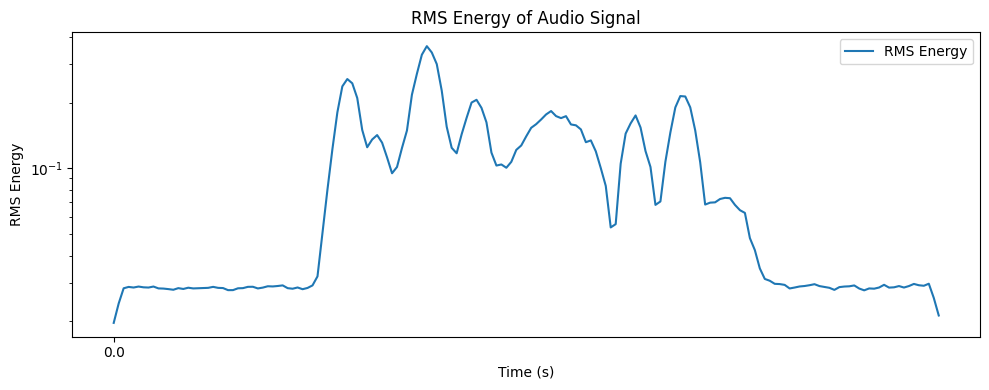

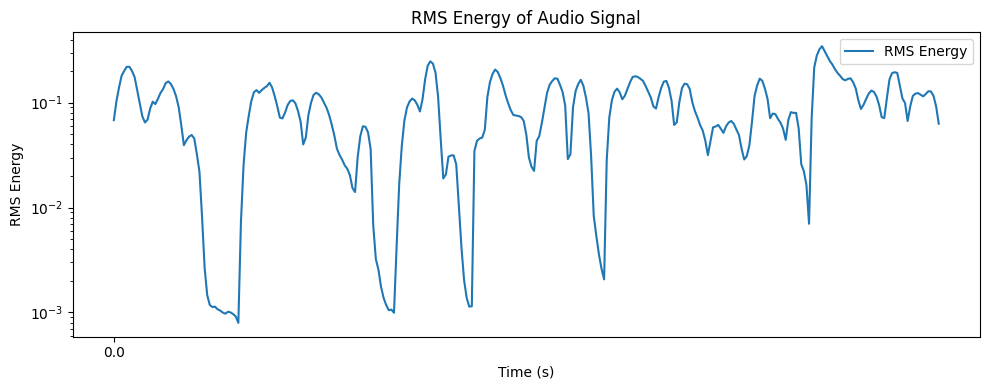

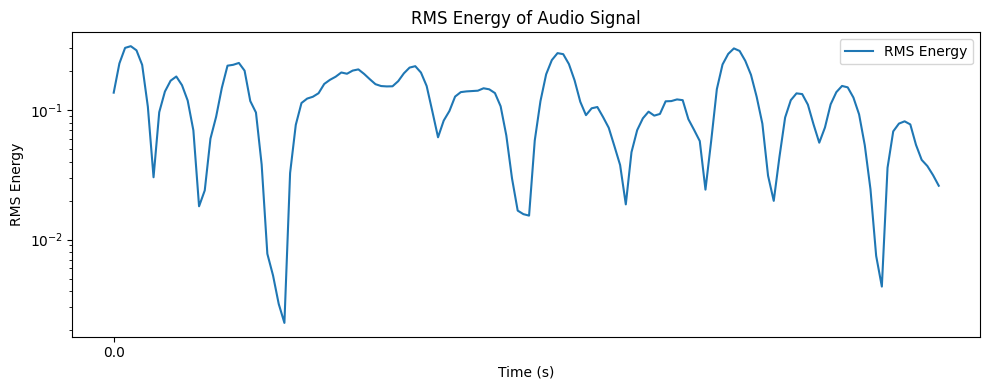

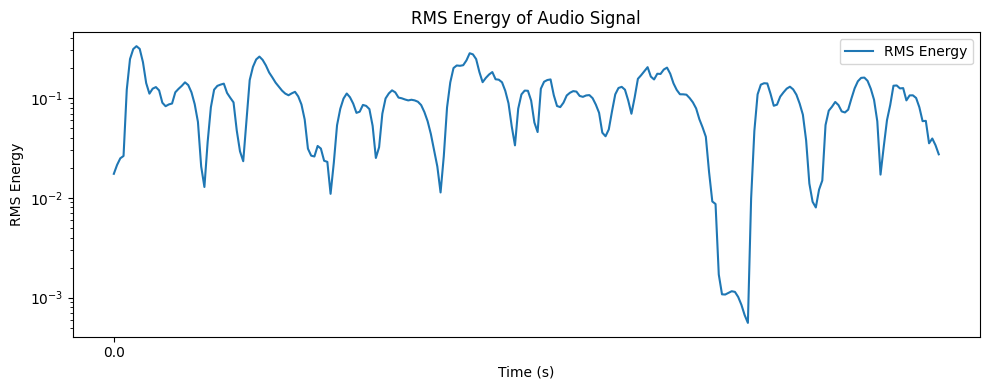

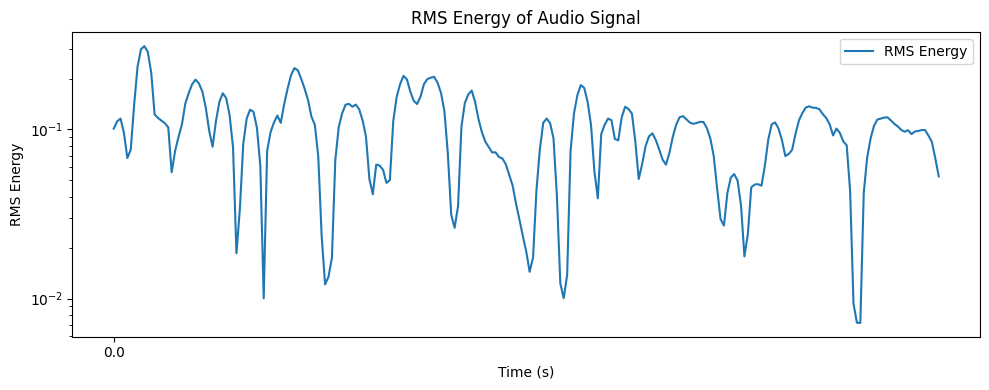

In [49]:
for index, row in train_sample_real_df.iterrows():
    audio_file = row['path']
    
    # 오디오 파일 로드
    y, sr = librosa.load(audio_file)

    # RMS 에너지 계산
    rms = librosa.feature.rms(y=y)

    # RMS 에너지 시각화
    plt.figure(figsize=(10, 4))
    plt.semilogy(rms.T, label='RMS Energy')
    plt.xticks(np.arange(0, rms.shape[-1], sr//2), np.arange(0, rms.shape[-1], sr//2) / (sr//2))
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.title('RMS Energy of Audio Signal')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## train fake

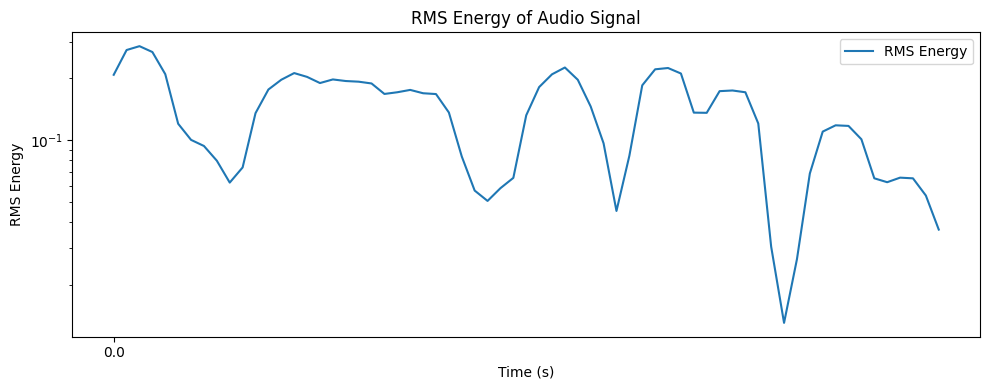

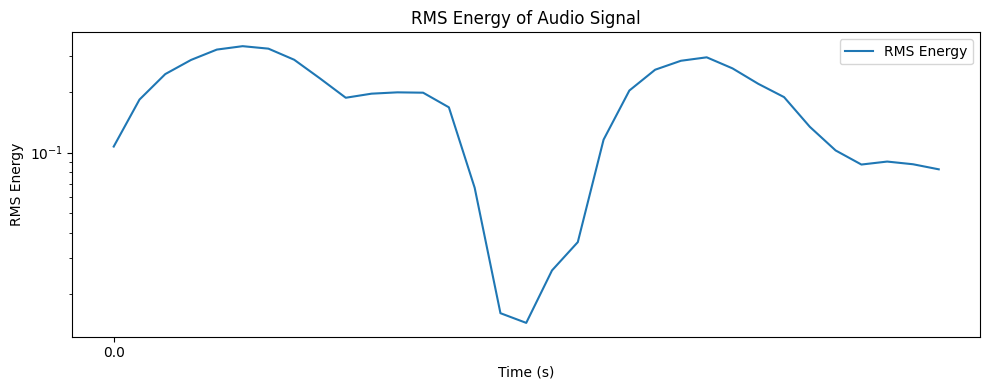

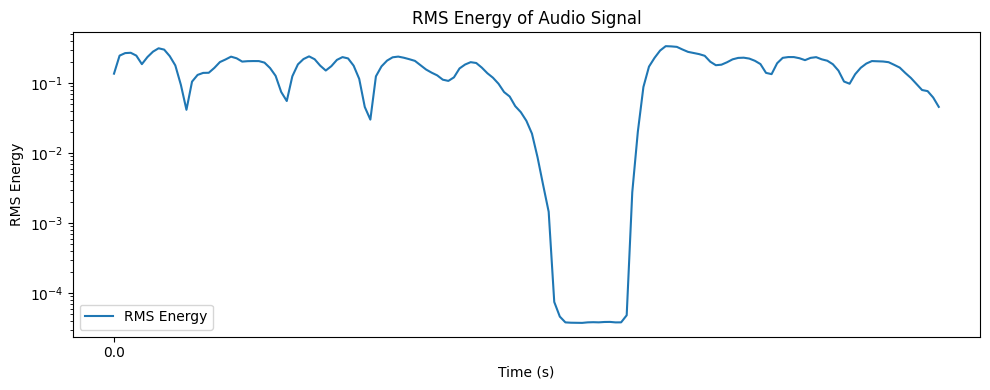

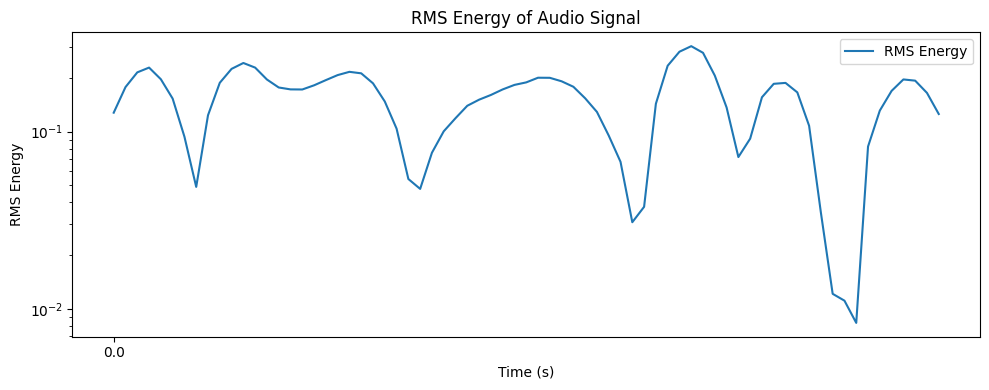

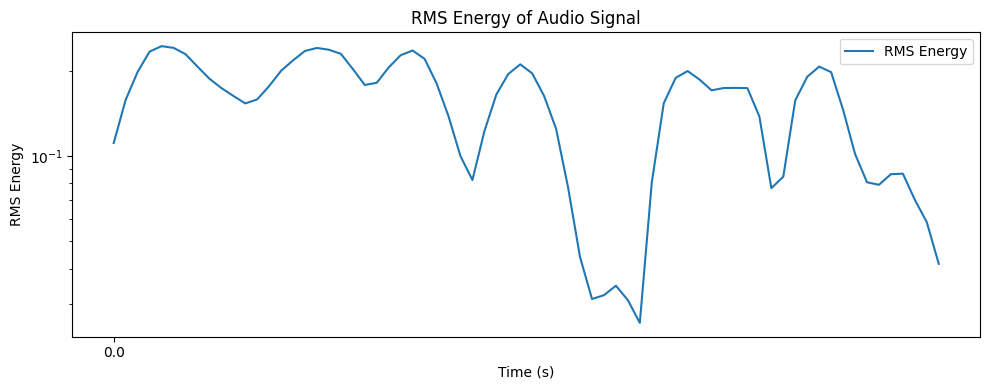

In [6]:
for index, row in train_sample_fake_df.iterrows():
    audio_file = row['path']
    
    # 오디오 파일 로드
    y, sr = librosa.load(audio_file)

    # RMS 에너지 계산
    rms = librosa.feature.rms(y=y)

    # RMS 에너지 시각화
    plt.figure(figsize=(10, 4))
    plt.semilogy(rms.T, label='RMS Energy')
    plt.xticks(np.arange(0, rms.shape[-1], sr//2), np.arange(0, rms.shape[-1], sr//2) / (sr//2))
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.title('RMS Energy of Audio Signal')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [14]:
# for index, row in test_sample_df.iterrows():
#     